#  DATASCIENCE PROJECT @ THE SPARKS FOUNDATION

## GRIP TASK-2:(Unsupervised Learning Using K-Means Clustering)

### AURHOR-SPARSH JAIN

In [1]:
#IMPORTING NECESSARY LIBRARY 

import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

In [2]:
df=pd.read_csv(r"D:\COMP\SPARKS\TASK 2\Iris.csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
df['Species'].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

### THE ELBOW PLOT METHOD:

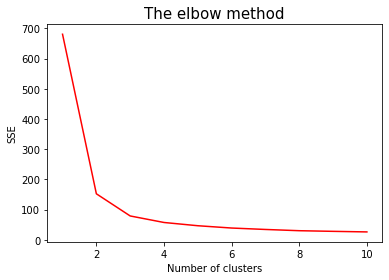

In [6]:
x = df.iloc[:, [1, 2, 3, 4]].values

from sklearn.cluster import KMeans
SSE = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10)
    kmeans.fit(x)
    SSE.append(kmeans.inertia_)
    
# Plotting the results onto a line graph

plt.plot(range(1, 11), SSE,color="red")
plt.title('The elbow method',fontsize=15)
plt.xlabel('Number of clusters',fontsize=10)
plt.ylabel('SSE',fontsize=10) 
plt.show()

In [7]:
pip install kneed

Note: you may need to restart the kernel to use updated packages.


In [8]:
from kneed import DataGenerator, KneeLocator
kl = KneeLocator(range(1, 11), SSE, curve="convex", direction="decreasing")
kl.elbow

3

### FEATURE SCALING:

In [17]:
from sklearn.preprocessing import MinMaxScaler
scalar=MinMaxScaler()
scalar.fit(x)
x=scalar.transform(x)
x

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

### BUILDING MODEL:

In [10]:
# Applying kmeans to the dataset / Creating the kmeans classifier

n=kl.elbow

kmeans = KMeans(n_clusters = n, init = 'k-means++',
                max_iter = 300, n_init = 10)
y_kmeans = kmeans.fit_predict(x)

### CLUSTERING:

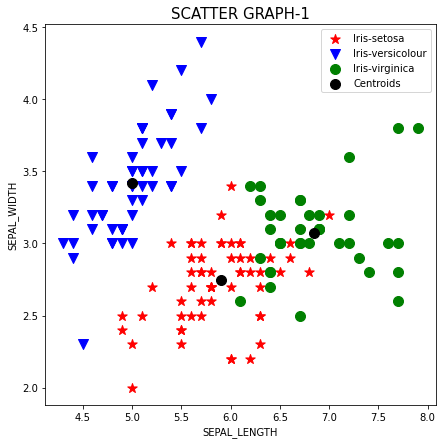

In [11]:
# Visualising the clusters - On the first two columns
fig = plt.figure(figsize = (7,7))

plt.scatter(x[y_kmeans == 0, 0],x[y_kmeans == 0, 1],
        s =100,c='red', label = 'Iris-setosa',marker='*')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s =100,c= 'blue', label = 'Iris-versicolour',marker='v')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s =100,c='green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'black', label = 'Centroids')

plt.title('SCATTER GRAPH-1',fontsize=15)
plt.xlabel('SEPAL_LENGTH',fontsize=10)
plt.ylabel('SEPAL_WIDTH',fontsize=10) 
plt.legend()

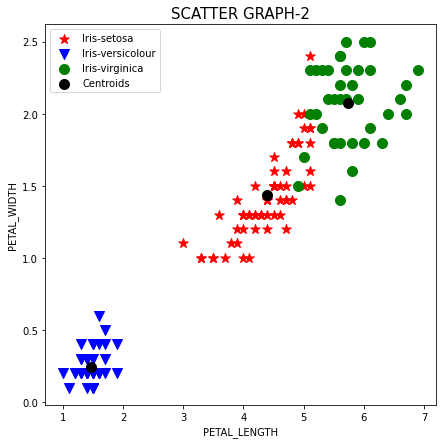

In [12]:
fig = plt.figure(figsize = (7,7))

plt.scatter(x[y_kmeans == 0, 2],x[y_kmeans == 0, 3],
        s =100,c='red', label = 'Iris-setosa',marker='*')
plt.scatter(x[y_kmeans == 1, 2], x[y_kmeans == 1, 3], 
            s =100,c= 'blue', label = 'Iris-versicolour',marker='v')
plt.scatter(x[y_kmeans == 2, 2], x[y_kmeans == 2, 3],
            s =100,c='green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:,3], 
            s = 100, c = 'black', label = 'Centroids')

plt.title('SCATTER GRAPH-2',fontsize=15)
plt.xlabel('PETAL_LENGTH',fontsize=10)
plt.ylabel('PETAL_WIDTH',fontsize=10) 
plt.legend()

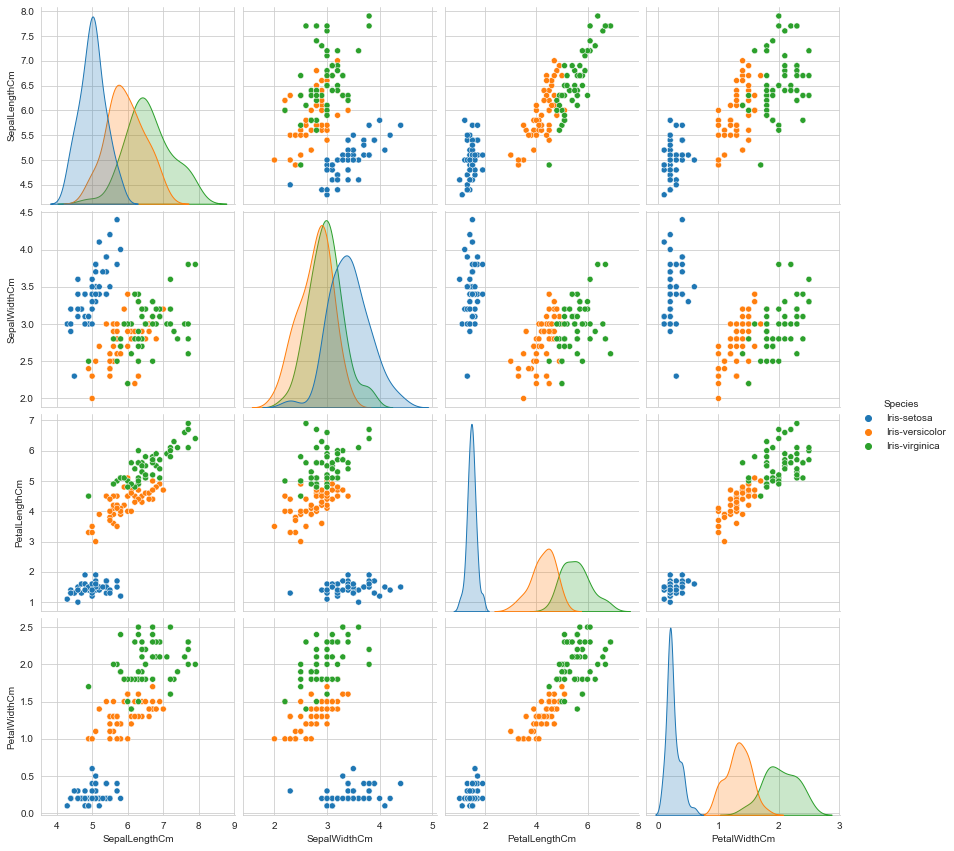

In [13]:
import seaborn as sns

df1=df.drop(["Id"],axis=1)
sns.set_style("whitegrid")
sns.pairplot(df1,hue="Species",height=3);
plt.show()

<IPython.core.display.Javascript object>


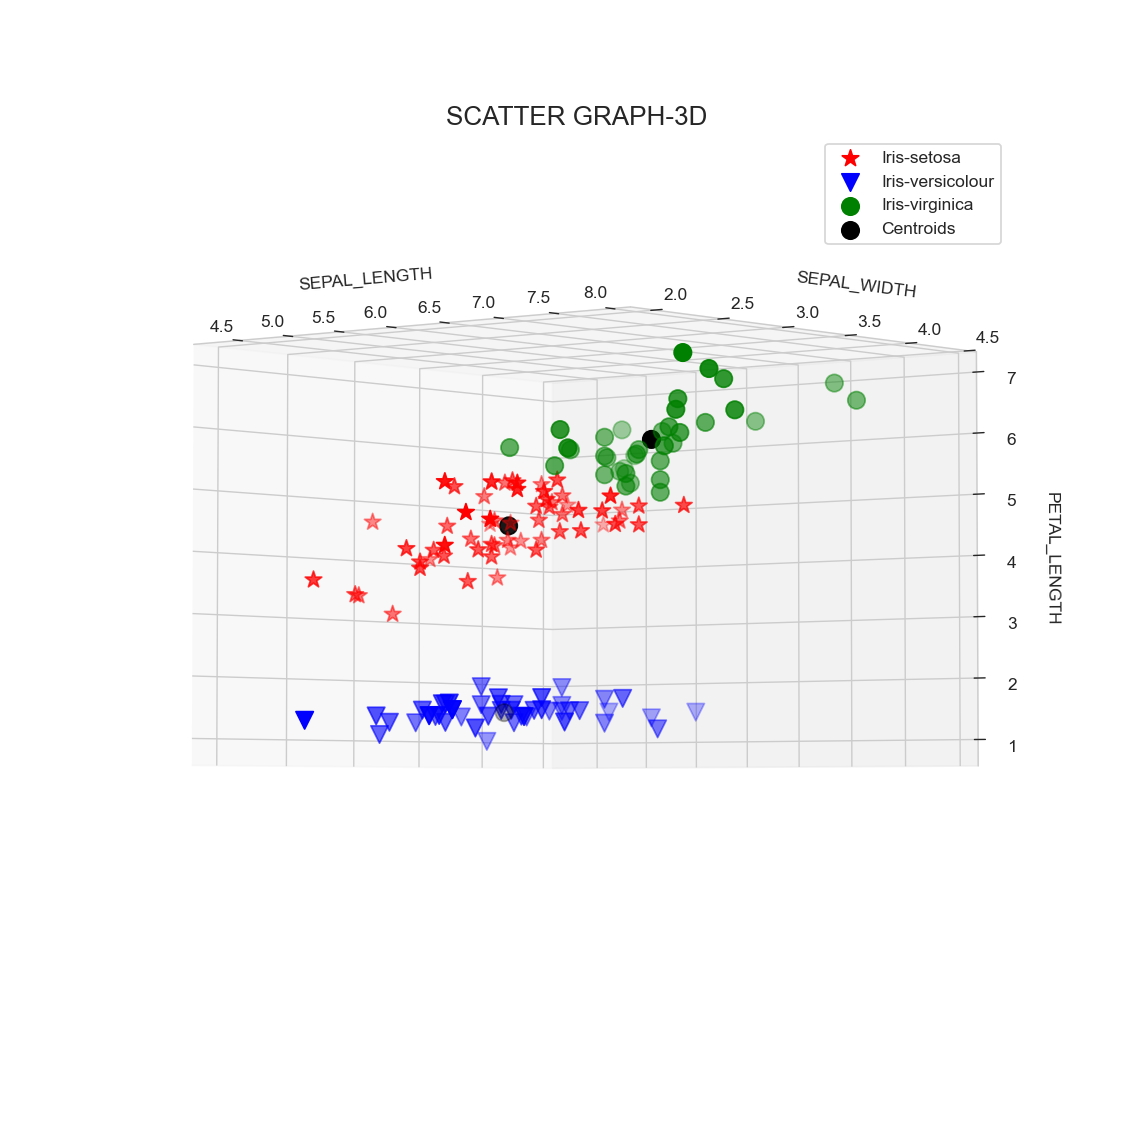

In [14]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure(figsize = (9,9))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[y_kmeans == 0, 0],x[y_kmeans == 0, 1], x[y_kmeans == 0, 2],
        s =100,c='red', label = 'Iris-setosa',marker='*')
ax.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], x[y_kmeans == 1, 2],
            s =100,c= 'blue', label = 'Iris-versicolour',marker='v')
ax.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], x[y_kmeans == 2, 2],
            s =100,c='green', label = 'Iris-virginica')

ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], kmeans.cluster_centers_[:,2], 
            s = 100, c = 'black', label = 'Centroids')


ax.set_title('SCATTER GRAPH-3D',fontsize=15)
ax.set_xlabel('SEPAL_LENGTH',fontsize=10)
ax.set_ylabel('SEPAL_WIDTH',fontsize=10)
ax.set_zlabel('PETAL_LENGTH',fontsize=10) 
plt.legend()